In [10]:
import numpy as np
import timm
from datasets import load_dataset
import io
import torch
from tqdm import tqdm
from transformers import AutoImageProcessor, AutoProcessor, SegformerForSemanticSegmentation, DetrForSegmentation, CLIPSegForImageSegmentation

from transformers.image_transforms import rgb_to_id
from PIL import Image
import requests
import os
import matplotlib.pyplot as plt
import time
from extranodes import segment

In [23]:

# assign directory for train/testing
directory = 'data/input_training_highres/'
 

train = ["data/input_training_highres/GT07.png"]
# for filename in os.scandir(directory):
#     if filename.is_file():
#         train.append(filename.path)

# train = sorted(train)

In [24]:
"""Segformer + extranodes"""

image_processor = AutoImageProcessor.from_pretrained("nvidia/segformer-b0-finetuned-ade-512-512")
model = SegformerForSemanticSegmentation.from_pretrained("nvidia/segformer-b0-finetuned-ade-512-512")


for path in train:
    image = Image.open(path)
   
    inputs = image_processor(images=image, return_tensors="pt")
    outputs = model(**inputs)
    logits = outputs.logits  # shape (batch_size, num_labels, height/4, width/4)
    im = (logits.detach().numpy())[0, :, :, :]
    im = im.transpose(1, 2, 0)
    







Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
/home/rahul/.conda/envs/torchenv/lib/python3.10/site-packages/transformers/models/segformer/image_processing_segformer.py:99: FutureWarning: The `reduce_labels` parameter is deprecated and will be removed in a future version. Please use `do_reduce_labels` instead.
  warnings.warn(


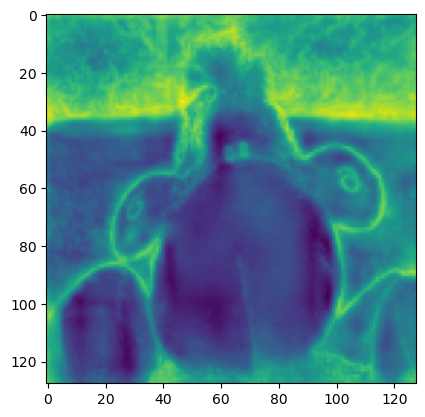

In [25]:
plt.imshow(im[:,:, 0])

In [31]:
sigma_C = 3
list_L = np.linspace(0, 10, 10)
for l in list_L:
    start_seg = time.time()
    img_segment = segment(im, sigma_C, l)
    end_seg = time.time()
    seg_time = end_seg - start_seg
    print(f"segmentation finished in time {seg_time} seconds")

    seg_image_color = (img_segment[0]).reshape((im.shape[0], im.shape[1]), order="C")
    image_color = (img_segment[1]).reshape((im.shape[0], im.shape[1], im.shape[2]), order="C")
    plt.imsave(f"custom-tests/sigma{sigma_C}_mu{l}_segment.png", seg_image_color, cmap = "gray")
    plt.clf()
    plt.imsave(f"custom-tests/sigma{sigma_C}_mu{l}_image.png", image_color[:,:, 0])
    plt.clf()
  
# img_segment = segment(im, 3, 3)
# seg_image_color = (img_segment[0]).reshape((im.shape[0], im.shape[1]), order="C")
# plt.imshow(seg_image_color)

/home/rahul/.conda/envs/torchenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


segmentation finished in time 517.6918878555298 seconds


/home/rahul/.conda/envs/torchenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


segmentation finished in time 61.03376603126526 seconds


/home/rahul/.conda/envs/torchenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


segmentation finished in time 55.403923749923706 seconds


/home/rahul/.conda/envs/torchenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


segmentation finished in time 64.69478559494019 seconds


/home/rahul/.conda/envs/torchenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


segmentation finished in time 48.4337956905365 seconds


/home/rahul/.conda/envs/torchenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


segmentation finished in time 69.14125108718872 seconds


/home/rahul/.conda/envs/torchenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


segmentation finished in time 64.2938163280487 seconds


/home/rahul/.conda/envs/torchenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


segmentation finished in time 56.35996723175049 seconds


/home/rahul/.conda/envs/torchenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


segmentation finished in time 47.22350358963013 seconds
segmentation finished in time 66.48048806190491 seconds


/home/rahul/.conda/envs/torchenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Figure size 640x480 with 0 Axes>